In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = 'Korean Data/'
os.listdir(path)

['inp_deri_up_other.csv',
 'out_other_up.csv',
 'inp_deri_other_up_test.csv',
 'out_other_up_test.csv']

In [4]:
X_train = pd.read_csv(path+'inp_deri_up_other.csv')

y_train = pd.read_csv(path+'out_other_up.csv')
y_test = pd.read_csv(path+'out_other_up_test.csv')

X_test = pd.read_csv(path+'inp_deri_other_up_test.csv')
print(y_train.head())
X_train.head()

   0.43756
0  0.43756
1  0.43887
2  0.43854
3  0.43953
4  0.43986


,0.01061,0.01061.1,0.01061.2,0.01061.3,0.01061.4,0.01061.5,0.01061.6,0.01061.7,0.01061.8,0.01061.9,0.01061.10,0.01061.11,0.01061.12,0.01061.13,0.01061.14,0.01061.15,0.01061.16,0.01061.17,0.01061.18,0.01061.19
0,0.010345,0.010080,0.009815,0.009549,0.009284,0.009019,0.008754,0.008488,0.008223,0.007958,0.007692,0.007427,0.007162,0.006897,0.006632,0.006366,0.006101,0.005836,0.005570,0.005305
1,0.010216,0.009828,0.009447,0.009072,0.008704,0.008342,0.007988,0.007639,0.007298,0.006963,0.006635,0.006313,0.005998,0.005690,0.005388,0.005093,0.004804,0.004523,0.004248,0.003979
2,0.010131,0.009664,0.009210,0.008769,0.008341,0.007925,0.007522,0.007130,0.006751,0.006383,0.006027,0.005682,0.005348,0.005026,0.004715,0.004414,0.004124,0.003844,0.003575,0.003316
3,0.010067,0.009543,0.009038,0.008550,0.008080,0.007628,0.007193,0.006774,0.006371,0.005984,0.005612,0.005256,0.004914,0.004586,0.004273,0.003973,0.003686,0.003412,0.003150,0.002901
4,0.010017,0.009448,0.008902,0.008379,0.007879,0.007399,0.006941,0.006503,0.006084,0.005685,0.005304,0.004940,0.004594,0.004265,0.003952,0.003655,0.003372,0.003105,0.002851,0.002611


In [5]:
len(X_train),len(y_test),len(y_train)

(75991, 15995, 75991)

In [6]:
x_train,y_train,x_test,y_test = np.array(X_train),np.array(y_train),np.array(X_test),np.array(y_test)

In [ ]:
# Random Forest
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()
print('Time taken by Random Forest',t2-t1)
    
y1_pred = rf.predict(x_test)
y1 = y1_pred
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))

In [ ]:
error = []
for i in range(len(y_test)):
    error.append(abs(y1_pred[i]-y_test[i,0]))
print('Minimum Error =',min(error))
print('Maximum Error =',max(error))
error1 = sorted(error)
print('Median Value of Error =',error1[len(error)//2])
    
# COMPARISON
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1[:6000], label = 'Random Forest')
plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.show()

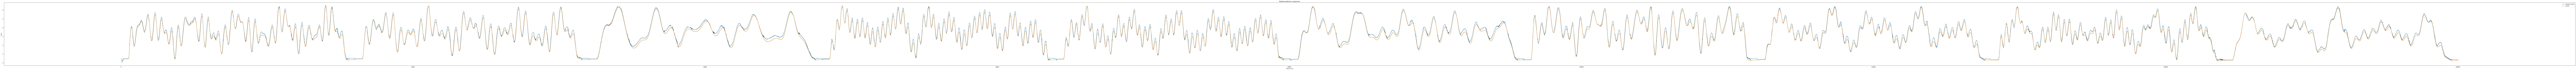

In [21]:
plt.figure(figsize=(400,10))
plt.plot(list(range(160034)),y1[:160034], label = 'Random Forest')
plt.plot(list(range(160034)),y_test[:160034], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.savefig('RF_korean_object1.jpg')
plt.savefig('RF_korean_object1.svg')
plt.show()

In [7]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x_train,y_train)
t2 = datetime.now()

Learning rate set to 0.08116
0:	learn: 1.5034786	total: 65.8ms	remaining: 1m 5s
1:	learn: 1.3842206	total: 71.4ms	remaining: 35.6s
2:	learn: 1.2746583	total: 76.3ms	remaining: 25.3s
3:	learn: 1.1739431	total: 81.1ms	remaining: 20.2s
4:	learn: 1.0812113	total: 86.1ms	remaining: 17.1s
5:	learn: 0.9959177	total: 91.2ms	remaining: 15.1s
6:	learn: 0.9174857	total: 96ms	remaining: 13.6s
7:	learn: 0.8453389	total: 103ms	remaining: 12.8s
8:	learn: 0.7789523	total: 112ms	remaining: 12.4s
9:	learn: 0.7180867	total: 121ms	remaining: 12s
10:	learn: 0.6616013	total: 131ms	remaining: 11.7s
11:	learn: 0.6099986	total: 137ms	remaining: 11.3s
12:	learn: 0.5625155	total: 141ms	remaining: 10.7s
13:	learn: 0.5186256	total: 146ms	remaining: 10.3s
14:	learn: 0.4780898	total: 151ms	remaining: 9.9s
15:	learn: 0.4410844	total: 157ms	remaining: 9.67s
16:	learn: 0.4074745	total: 177ms	remaining: 10.3s
17:	learn: 0.3760591	total: 182ms	remaining: 9.95s
18:	learn: 0.3471240	total: 188ms	remaining: 9.69s
19:	learn:

In [8]:
print('Time taken by Cat Boosting:',t2-t1)

y_pred = cat.predict(x_test)
print('Root mean square error of Cat Boost Model: ',sqrt(mean_squared_error(y_test,y_pred)))

Time taken by Cat Boosting: 0:00:06.191118
Root mean square error of Cat Boost Model:  0.15031361400850304


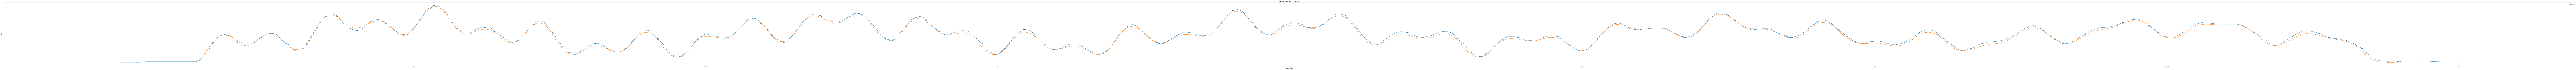

In [9]:
plt.figure(figsize=(400,10))
plt.plot(list(range(15994)),y_pred[:15994], label = 'Cat Boost')
plt.plot(list(range(15994)),y_test[:15994], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.savefig('catboost_korean_object1.jpg')
plt.savefig('catboost_korean_object1.svg',format = 'svg')
plt.show()

In [10]:
import pickle
filename = 'catboost_object1.sav'
pickle.dump(cat, open(filename, 'wb'))

In [11]:
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(x_test)
print('Root mean square error of Cat Boost Model: ',sqrt(mean_squared_error(y_test,y_pred)))

Root mean square error of Cat Boost Model:  0.15031361400850304
